In [2]:
import pandas as pd

In [3]:
placements = pd.read_csv('Placement_Data_Full_Class.csv')

In [4]:
placements.shape

(215, 15)

In [5]:
#first Look at the data 
placements.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [7]:
#checking the dataset information
placements.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [8]:
#checking the null values in the dataset
placements.isna().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [9]:
placement = placements.drop(['salary'], axis=1)

In [10]:
placement.isna().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
dtype: int64

In [11]:
placement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
dtypes: float64(5), int64(1), object(8)
memory usage: 23.6+ KB


In [12]:
#label Encoding --> Converts the object data to numerical
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
placement["gender"]=le.fit_transform(placement["gender"])
placement["ssc_b"]=le.fit_transform(placement["ssc_b"])
placement["hsc_b"]=le.fit_transform(placement["hsc_b"])
placement["hsc_s"]=le.fit_transform(placement["hsc_s"])
placement["degree_t"]=le.fit_transform(placement["degree_t"])
placement["workex"]=le.fit_transform(placement["workex"])
placement["specialisation"]=le.fit_transform(placement["specialisation"])
placement["status"]=le.fit_transform(placement["status"])


In [13]:
placement.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,1,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1
1,2,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1
2,3,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1
3,4,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0
4,5,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1


In [15]:
#EDA and Outlier Analysis
#five point summary 
placement.describe()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000
mean,108.000000,0.646512,67.303395,0.460465,66.333163,0.609302,1.372093,66.370186,0.600000,0.344186,72.100558,0.441860,62.278186,0.688372
std,62.209324,0.479168,10.827205,0.499598,10.897509,0.489045,0.580978,7.358743,0.890238,0.476211,13.275956,0.497767,5.833385,0.464240
min,1.000000,0.000000,40.890000,0.000000,37.000000,0.000000,0.000000,50.000000,0.000000,0.000000,50.000000,0.000000,51.210000,0.000000
25%,54.500000,0.000000,60.600000,0.000000,60.900000,0.000000,1.000000,61.000000,0.000000,0.000000,60.000000,0.000000,57.945000,0.000000
50%,108.000000,1.000000,67.000000,0.000000,65.000000,1.000000,1.000000,66.000000,0.000000,0.000000,71.000000,0.000000,62.000000,1.000000
75%,161.500000,1.000000,75.700000,1.000000,73.000000,1.000000,2.000000,72.000000,2.000000,1.000000,83.500000,1.000000,66.255000,1.000000
max,215.000000,1.000000,89.400000,1.000000,97.700000,1.000000,2.000000,91.000000,2.000000,1.000000,98.000000,1.000000,77.890000,1.000000


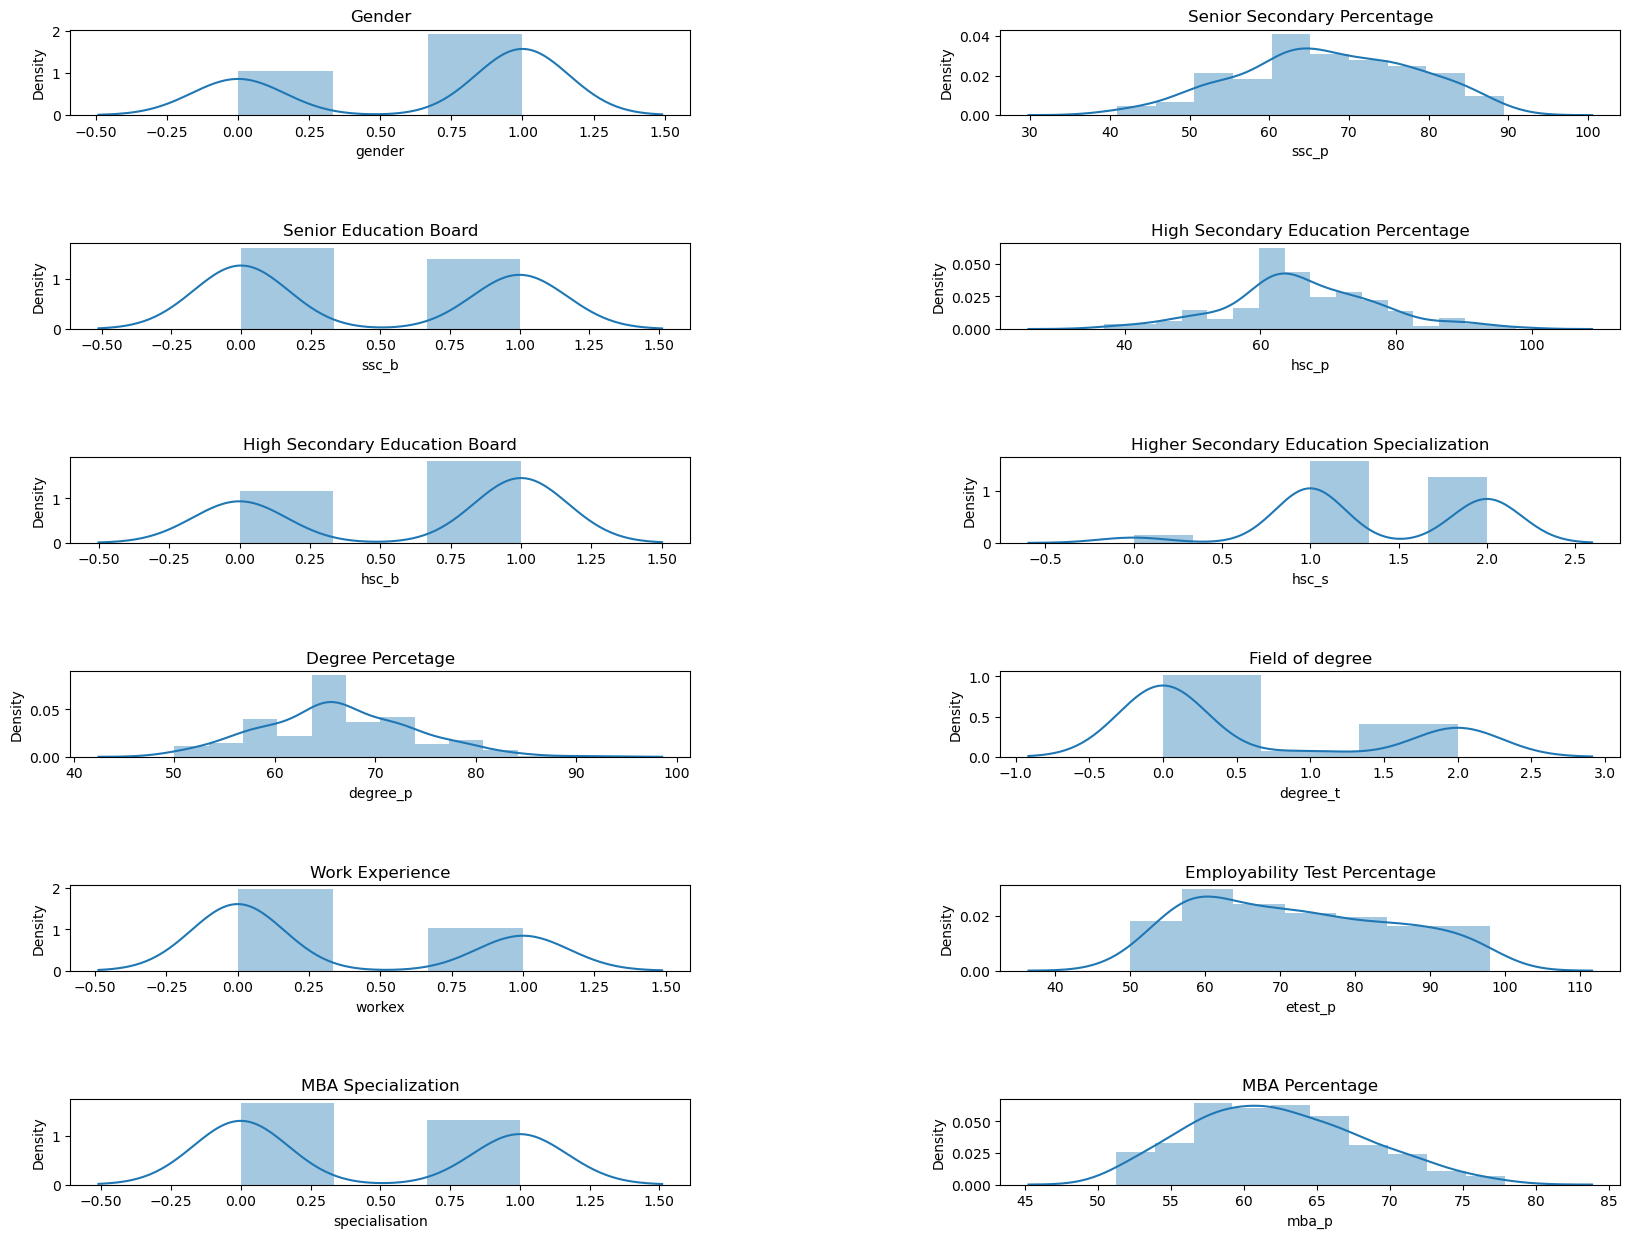

In [16]:
#frequency Distribution
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

fig, axes = plt.subplots(6,2, figsize=(20,15))


plt.subplot(6,2,1)
sns.distplot(placement['gender'])
plt.title("Gender")

plt.subplot(6,2,2)
sns.distplot(placement['ssc_p'])
plt.title("Senior Secondary Percentage")

plt.subplot(6,2,3)
sns.distplot(placement['ssc_b'])
plt.title("Senior Education Board")

plt.subplot(6,2,4)
sns.distplot(placement['hsc_p'])
plt.title("High Secondary Education Percentage")

plt.subplot(6,2,5)
sns.distplot(placement['hsc_b'])
plt.title("High Secondary Education Board")

plt.subplot(6,2,6)
sns.distplot(placement['hsc_s'])
plt.title("Higher Secondary Education Specialization")

plt.subplot(6,2,7)
sns.distplot(placement['degree_p'])
plt.title("Degree Percetage")

plt.subplot(6,2,8)
sns.distplot(placement['degree_t'])
plt.title("Field of degree")

plt.subplot(6,2,9)
sns.distplot(placement['workex'])
plt.title("Work Experience")

plt.subplot(6,2,10)
sns.distplot(placement['etest_p'])
plt.title("Employability Test Percentage")

plt.subplot(6,2,11)
sns.distplot(placement['specialisation'])
plt.title("MBA Specialization")

plt.subplot(6,2,12)
sns.distplot(placement['mba_p'])
plt.title("MBA Percentage")

plt.subplots_adjust(hspace=1.5, wspace=0.5)

<AxesSubplot:xlabel='status', ylabel='Density'>

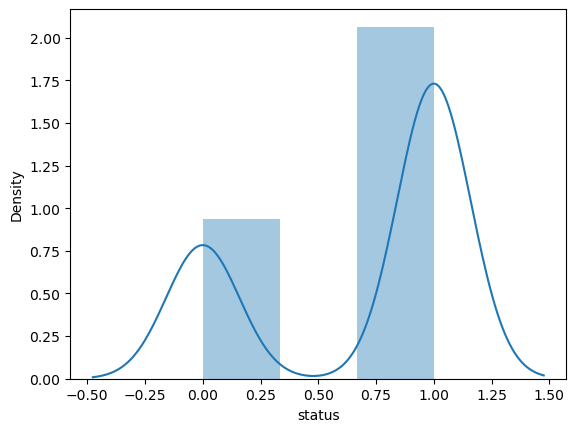

In [17]:
sns.distplot(placement['status'])

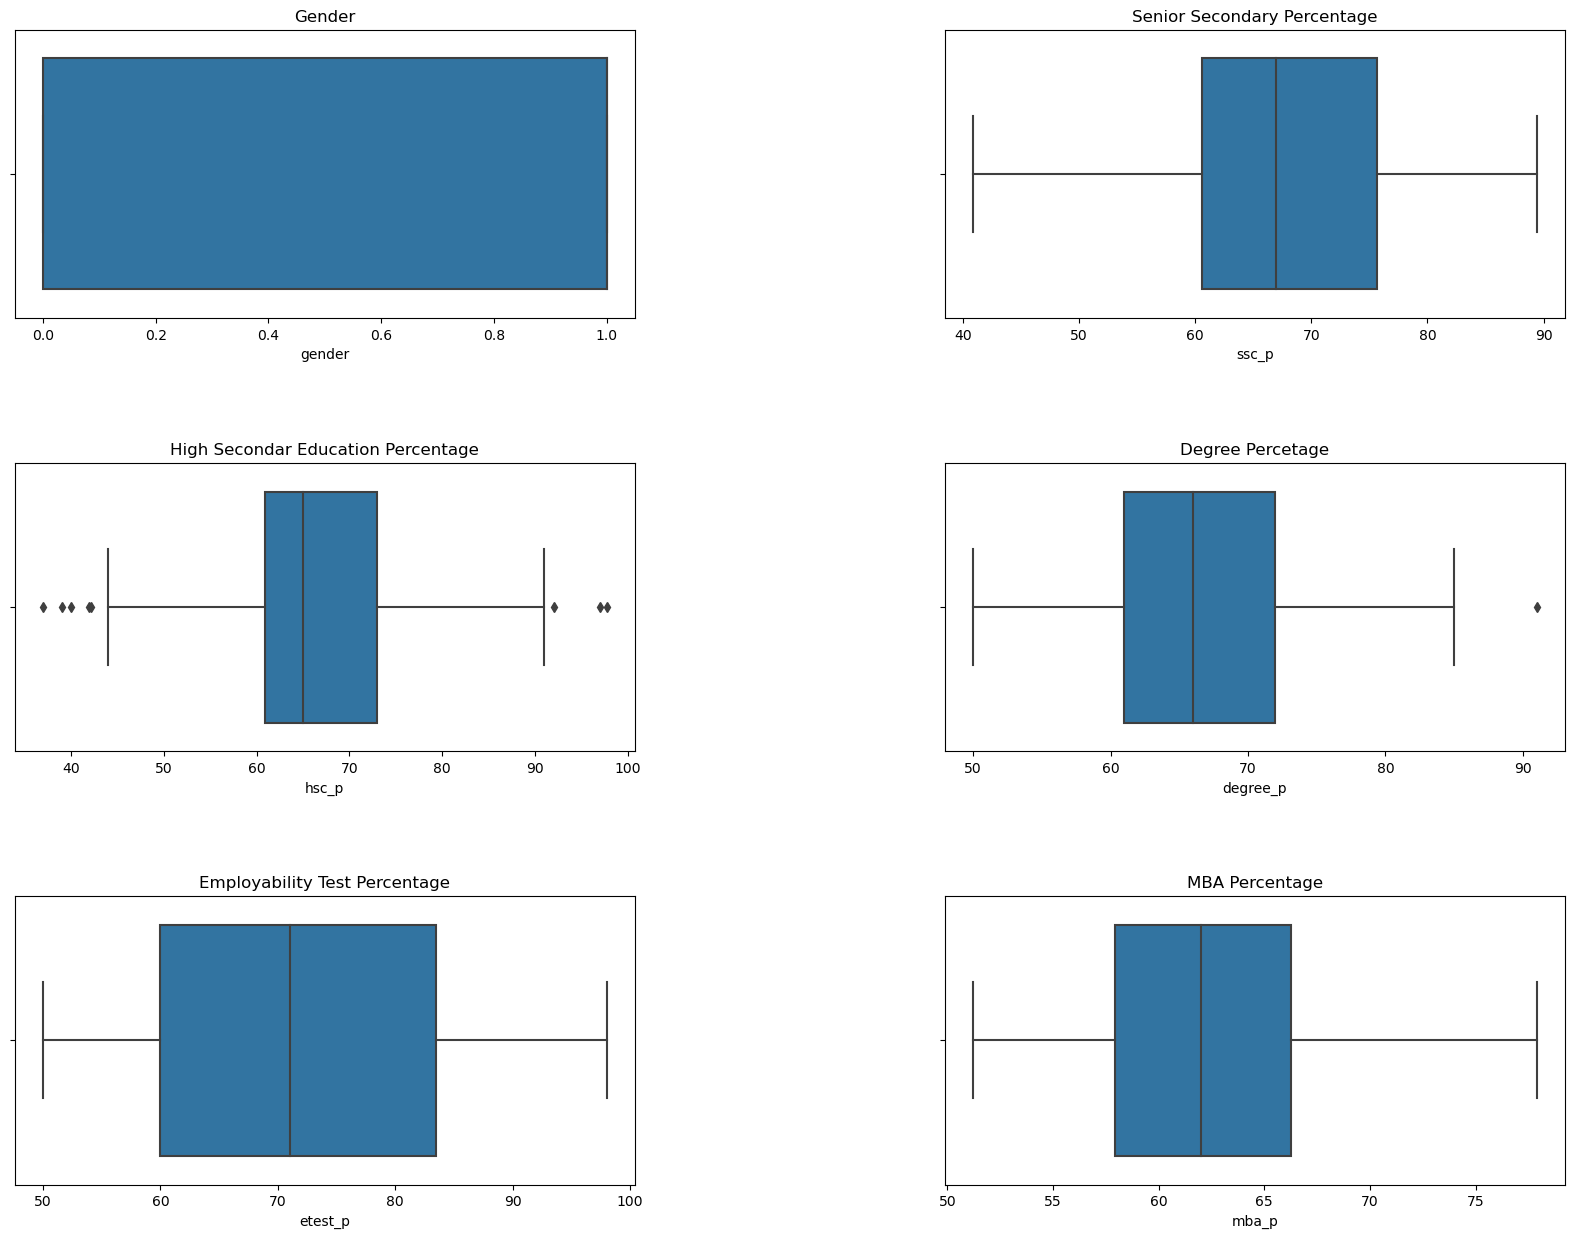

In [18]:
#outlier Analysis
fig, axes = plt.subplots(3,2, figsize=(20,15))


plt.subplot(3,2,1)
sns.boxplot(placement['gender'])
plt.title("Gender")

plt.subplot(3,2,2)
sns.boxplot(placement['ssc_p'])
plt.title("Senior Secondary Percentage")


plt.subplot(3,2,3)
sns.boxplot(placement['hsc_p'])
plt.title("High Secondar Education Percentage")


plt.subplot(3,2,4)
sns.boxplot(placement['degree_p'])
plt.title("Degree Percetage")


plt.subplot(3,2,5)
sns.boxplot(placement['etest_p'])
plt.title("Employability Test Percentage")


plt.subplot(3,2,6)
sns.boxplot(placement['mba_p'])
plt.title("MBA Percentage")

plt.subplots_adjust(hspace=0.5, wspace=0.5)

<AxesSubplot:>

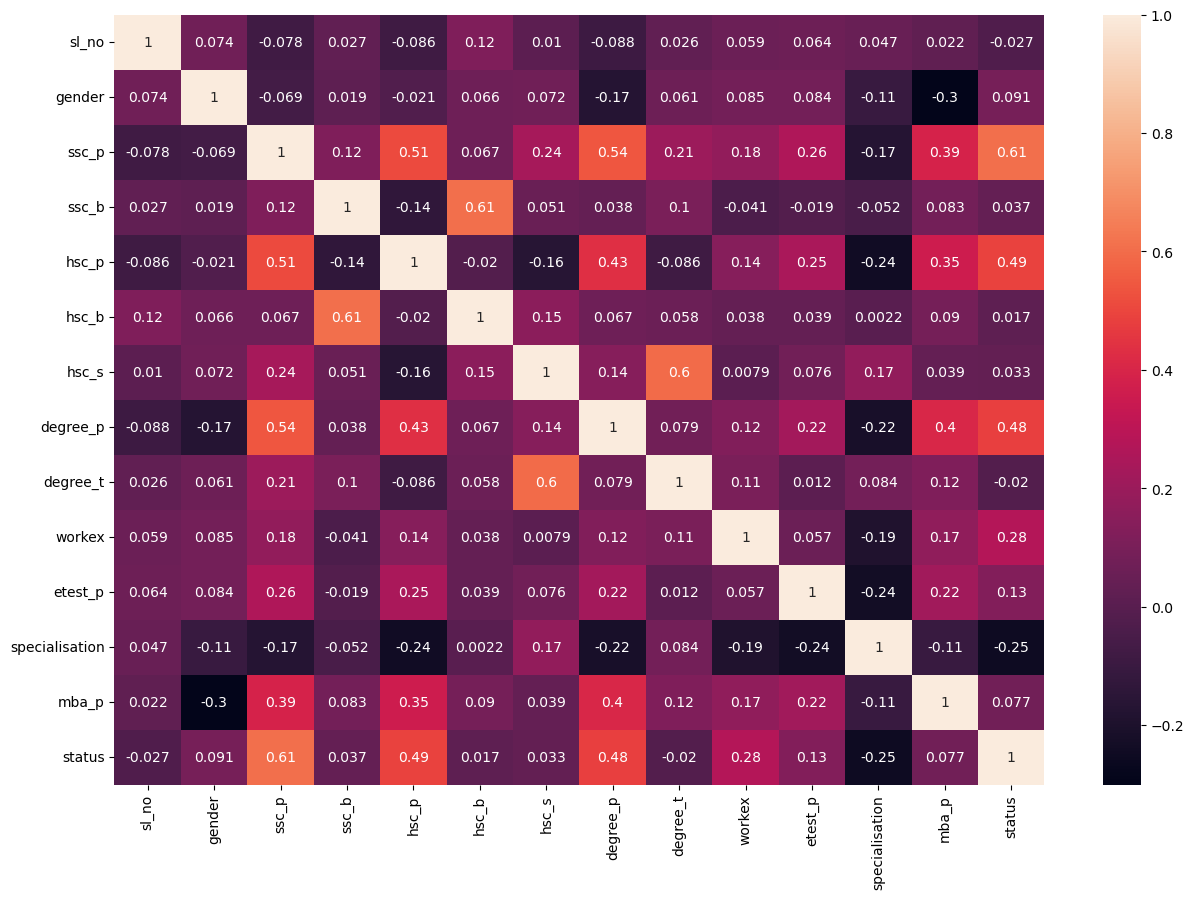

In [19]:
#Correlation
corr = placement.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True)

In [20]:
#dependent and Independent Features - Based on the correlation coefficients
X_ = placement.drop(['status','sl_no', 'gender', 'ssc_b', 'hsc_b',
                     'hsc_s','degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p'], axis=1)
y_ = placement['status']

In [21]:
X_

,ssc_p,hsc_p,degree_p
0,67.00,91.00,58.00
1,79.33,78.33,77.48
2,65.00,68.00,64.00
3,56.00,52.00,52.00
4,85.80,73.60,73.30
...,...,...,...
210,80.60,82.00,77.60
211,58.00,60.00,72.00
212,67.00,67.00,73.00
213,74.00,66.00,58.00


In [22]:
y_

0      1
1      1
2      1
3      0
4      1
      ..
210    1
211    1
212    1
213    1
214    0
Name: status, Length: 215, dtype: int32

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
X_train_, X_test_, y_train_, y_test_ = train_test_split(X_, y_, test_size=0.3, random_state=1)

In [25]:
model_ = DecisionTreeClassifier()

In [26]:
model_.fit(X_train_, y_train_)

DecisionTreeClassifier()

In [27]:
pred_ = model_.predict(X_test_)

In [29]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [30]:
acc1 = accuracy_score(pred_, y_test_)
acc1

0.7692307692307693

In [31]:
from sklearn.metrics import classification_report

cf_ = classification_report(y_test_, pred_)
print(cf_)

              precision    recall  f1-score   support

           0       0.65      0.55      0.59        20
           1       0.81      0.87      0.84        45

    accuracy                           0.77        65
   macro avg       0.73      0.71      0.72        65
weighted avg       0.76      0.77      0.76        65



In [ ]:
# Now to improve the model's accuracy, I will perform hyperparameter tuning
# I am going to use GridSearch CV

In [32]:
param_dist = {
    'criterion':['gini','entropy'],
    'max_depth':[1,2,3,4,5,6,7,None]  # By default, if you don't mention anything, then it will be None
}

In [33]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(model_, param_grid = param_dist, cv = 10, n_jobs = -1)
# n_jobs --> -1 --> You want to use all the cores of your system to perform this task(dual core, quad core)

In [35]:
grid.fit(X_train_, y_train_)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, None]})

In [36]:
grid.best_params_ # For checking the best parameter 

{'criterion': 'gini', 'max_depth': 4}

In [37]:
grid.best_score_ # For checking the best score

0.8600000000000001

In [38]:
X = placement.drop(['status'], axis=1)
y = placement['status']

In [39]:
clf = DecisionTreeClassifier(criterion = 'gini', max_depth=4)

In [41]:
clf.fit(X, y)

DecisionTreeClassifier(max_depth=4)

In [42]:
pred_ = clf.predict(X)

In [43]:
pred_

array([1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1])

In [44]:
from sklearn.metrics import accuracy_score

In [45]:
acc_score = accuracy_score(y,pred_)*100
acc_score

87.90697674418605

In [47]:
from sklearn.metrics import classification_report, confusion_matrix

cf = classification_report(y, pred_)
print(cf)

              precision    recall  f1-score   support

           0       0.98      0.63      0.76        67
           1       0.85      0.99      0.92       148

    accuracy                           0.88       215
   macro avg       0.92      0.81      0.84       215
weighted avg       0.89      0.88      0.87       215



In [48]:
cf = confusion_matrix(y, pred_)
print(cf)

[[ 42  25]
 [  1 147]]


In [49]:
acc_score = accuracy_score(y,pred_)*100
acc_score

87.90697674418605